# Why is university tuition so high in the US?

There have been lots of news stories covering how university tuition is rising in the United States and is outpacing the financial means of students (before and after graduation). With the avaiable data from the US College Scorecard dataset, I will dive into this question and try to ascertain what is largest reason for rising tuition and produce cost-effective recommendations to alleviate the issue without harming the quality of education.

## College Scorecard

It's no secret that US university students often graduate with debt repayment obligations that far outstrip their employment and income prospects. In an effort to make educational investments less speculative, the US Department of Education has matched information from the student financial aid system with federal tax returns to create the College Scorecard dataset.

For my purposes, I'm going to examine the relationship between school tuition and other features of the dataset, along with changes in tuition over the lifetime of the Scorecard.

The full dataset can be found here: 
https://www.kaggle.com/kaggle/college-scorecard

College Scorecard website:
https://collegescorecard.ed.gov/data/

Full data documentation and dictionary, as well as all analysis, can be found here:
https://github.com/peanutshawny/us-tuition


In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## Reading data from file folder

Since there's datasets since the inception of the scorecard (1996) that could to be read in, I created a function that goes into the data folder, reads each csv, and concatenates each one onto a dataframe. 

Because each year of data contains over 2000 columns, it will be best if I select only the past seven years to reduce runtime. The function will then append the csv's one after another. It's possible that I could lose some insights by doing this as there could have been some key catalysts in the educational system in the years I did not cover. It would also be better to transfer these csv's into something like a sqlite database, but for my purposes reading and filtering with pandas should do for now. 

In [2]:
# outputs all csv's into one file and saves it as new csv 
def read_files(in_path, out_path):
    file_list = os.listdir(in_path)
    output = []
    
    for file_name in file_list:
        df = pd.read_csv(os.path.join(in_path, file_name))
        
        # adding a date column as the filename of the csv that the data point originated from
        df['DATE'] = file_name
        output.append(df)
    
    df_combined = pd.concat(output)
    
    # final combined data
    df_combined.to_csv(os.path.join(out_path, 'college_scorecard_fiveyears.csv'), index = False)

In [3]:
# executing function to reorganize last five years of data
read_files('D:/Python/validere_takehome/CollegeScorecard_Raw_Data/data', 
           'D:/Python/validere_takehome/CollegeScorecard_Raw_Data/combined_data')

c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (1,6,1461,1561,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\inte

In [4]:
# reading in files
uni_df = pd.read_csv('D:/Python/validere_takehome/CollegeScorecard_Raw_Data/combined_data/college_scorecard_fiveyears.csv', 
                     warn_bad_lines = False)
uni_df.head()

c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,6,7,8,9,31,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,DATE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv


In [5]:
# what is the shape of the data?
uni_df.shape

(67418, 1978)

Almost 70000 observations with about 2000 features. Essentially, each row corresponds to a specific school in a specific year. There are many features to the data with many features having mixed types! This will require a good amount of cleaning and reading of the data dictionary to drop unecessary features before conducting further analysis.

Looking at the data dictionary and sheer amount of features this dataset has, it would probably be best to pull useful features instead of dropping ones that aren't useful.

## Data cleaning

### Feature selection

After a read-through of the technical documentation, I selected some features that I thought would be interesting to analyze and may be related to rising tuition. Broad categories these features fit under include the location/size of the university, tuition, revenue/expenses, faculty salaries, acceptance rates, SAT averages, average debt/grants, repayment period of debt after graduation, family earnings, and earnings after graduation.  

In [6]:
columns = ['INSTNM', 'CITY', 'STABBR', 'ZIP', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'LOCALE', 'LOCALE2',
                 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'ADM_RATE', 'SAT_AVG',
                 'NPT4_PUB' ,'NPT4_PRIV', 'NPT4_PROG', 'NPT4_OTHER', 'NUM4_PUB', 'NUM4_PRIV' ,'NUM4_PROG', 'NUM4_OTHER',
                 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'PCTFLOAN', 
                  'DEP_STAT_PCT_IND', 'DEP_INC_AVG', 'IND_INC_AVG', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'MD_EARN_WNE_P6', 'DATE']

Time to split up the original dataframe into one that will actually be used for further analysis!

In [7]:
# splitting the dataframe
uni_df = uni_df[columns]
uni_df.shape

(67418, 39)

Only 39 columns to worry about, much better than looking at almost 2000 of them.

### Remapping column names
Let's remap these column names to ones that are a bit more descriptive.

In [ ]:
# creating a dictionary to map new feature names
columns_map = {'INSTNM': 'name', 'CITY': 'city', 'STABBR': 'state', 'ZIP': 'zip', 'NUMBRANCH': 'branches', 
               'PREDDEG': 'degrees_awarded_predominant', 'HIGHDEG': 'degrees_awarded_highest', 'LOCALE': 'locale', 
               'LOCALE2': 'degree_urbanization', 'LATITUDE': 'latitude', 'LONGITUDE': 'longitude', 'CCBASIC': 'class_basic', 
               'CCUGPROF': 'class_undergrad', 'CCSIZSET': 'class_size_and_setting', 'ADM_RATE': 'admission_rate', 
               'SAT_AVG': 'sat_avg_overall', 'NPT4_PUB': 'net_price_public','NPT4_PRIV': 'net_price_private', 
               'NPT4_PROG': 'net_price_program_year', 'NPT4_OTHER': 'net_price_other', 'NUM4_PUB': 'num_students_public', 
               'NUM4_PRIV': 'num_students_private' ,'NUM4_PROG': 'num_students_program_year', 'NUM4_OTHER': 'num_students_other',
               'TUITIONFEE_IN': 'instate_tuition', 'TUITIONFEE_OUT': 'outstate_tuition', 'TUITFTE': 'net_revenue_per_student', 
               'INEXPFTE': 'instructional_expenditure_per_student', 'AVGFACSAL': 'avg_faculty_salary', 
               'PFTFAC': 'ft_faculty_rate', 'PCTPELL': 'grant_rate', 'PCTFLOAN': 'federal_loan_rate', 
               'DEP_STAT_PCT_IND': 'financial_independent_student_rate', 'DEP_INC_AVG': 'avg_income_dependent_students', 
               'IND_INC_AVG': 'avg_income_independent_students', 'GRAD_DEBT_MDN': 'median_grad_debt', 
               'WDRAW_DEBT_MDN': 'median_withdraw_debt', 'MD_EARN_WNE_P6': 'median_earnings_6years', 'DATE': 'date'}

uni_df.rename(columns = columns_map, inplace = True)

# reordering columns
uni_df = uni_df[['name', 'city', 'state', 'zip', 'branches', 'date',
       'degrees_awarded_predominant', 'degrees_awarded_highest',
       'admission_rate', 'sat_avg_overall', 'net_price_public',
       'net_price_private', 'num_students_public', 'num_students_private',
       'instate_tuition', 'outstate_tuition', 'net_revenue_per_student',
       'instructional_expenditure_per_student', 'avg_faculty_salary',
       'ft_faculty_rate', 'grant_rate', 'federal_loan_rate',
       'financial_independent_student_rate', 'avg_income_dependent_students',
       'avg_income_independent_students', 'median_grad_debt',
       'median_withdraw_debt', 'median_earnings_6years']]

### Creating seperate dataframe to later build a corrmap

In [8]:
# creating separate dataframe to create a corrplot later
uni_df_to_corr = uni_df.iloc[:, 8:].reset_index()

# converting all values to float
for i in range(len(uni_df_to_corr.columns)):
    if uni_df_to_corr.iloc[:, i].dtypes != 'float64':
        uni_df_to_corr.iloc[:, i] = pd.to_numeric(uni_df_to_corr.iloc[:, i], errors = 'coerce', downcast = 'float')

### Looking at NA values

I want to now look at what percentage of this data is missing, just to get a sense of the completeness of the data. I can get the percentage of non-missing values in each column by taking the result of the count method and dividing by the number of rows.

In [9]:
uni_df.count() / len(uni_df)

name                                     1.000000
city                                     1.000000
state                                    1.000000
zip                                      1.000000
branches                                 1.000000
date                                     1.000000
degrees_awarded_predominant              1.000000
degrees_awarded_highest                  1.000000
admission_rate                           0.302412
sat_avg_overall                          0.183245
net_price_public                         0.248509
net_price_private                        0.530274
num_students_public                      0.249132
num_students_private                     0.534709
instate_tuition                          0.574209
outstate_tuition                         0.548414
net_revenue_per_student                  0.945237
instructional_expenditure_per_student    0.945252
avg_faculty_salary                       0.595153
ft_faculty_rate                          0.550372


The above represents the proportion of values that aren't na values. I'll get a better idea of the bigger picture if I graphed them across the entire dataset to see where they occur.

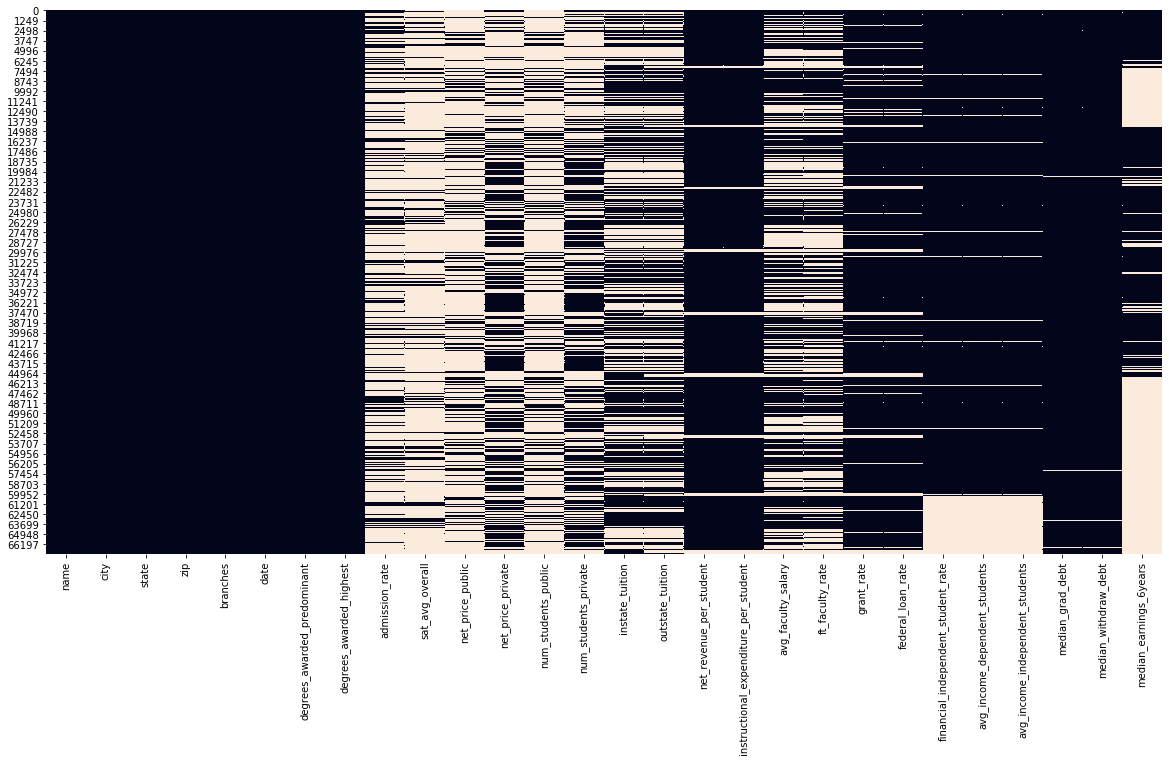

In [10]:
# how are na values distributed across the entire dataset?
plt.figure(figsize = (20,10))
sns.heatmap(uni_df.isnull(), cbar=False)

plt.show();

Plenty of NA values in these columns! There's also different patterns of NA values that emerge:

* Some features, because they are non-exhaustive, may have NA values instead of 0's in the field of the other type (net_price_public and net_price_private, for example). 
* Other features, such as locale, have missing values after a certain year. This may not be too much of an issue as locale, longitude, and latitude of schools remain the same year after year, and could be imputed as such. 
* Contrastingly, some other features have only been added recently, and so have insufficient data. 
* Finally, some features are missing values sporadically. This could be because the Scorecard contains no information on certain schools. This incomplete data may be due to either privacy issues or poor data collection practices. 

To start, let's delete all features with more than 90% NA values.

In [11]:
# dropping all columns with 100% NA values
uni_df = uni_df.loc[:, uni_df.isnull().sum() < 0.9 * uni_df.shape[0]]
uni_df.shape

(67418, 28)

In [12]:
uni_df.columns

Index(['name', 'city', 'state', 'zip', 'branches', 'date',
       'degrees_awarded_predominant', 'degrees_awarded_highest',
       'admission_rate', 'sat_avg_overall', 'net_price_public',
       'net_price_private', 'num_students_public', 'num_students_private',
       'instate_tuition', 'outstate_tuition', 'net_revenue_per_student',
       'instructional_expenditure_per_student', 'avg_faculty_salary',
       'ft_faculty_rate', 'grant_rate', 'federal_loan_rate',
       'financial_independent_student_rate', 'avg_income_dependent_students',
       'avg_income_independent_students', 'median_grad_debt',
       'median_withdraw_debt', 'median_earnings_6years'],
      dtype='object')

### Creating some new features
To solve some of the issues surrounding NA values in mutually exclusive features, I'm going to create some total columns for both net price and number of students, just so information could be simplified and the number of NA's could be reduced for the sake of analysis. 

In [13]:
# replacing all na values of mutually exclusive features with 0's
uni_df['net_price_private'].fillna(0, inplace = True)
uni_df['net_price_public'].fillna(0, inplace = True)
uni_df['num_students_public'].fillna(0, inplace = True)
uni_df['num_students_private'].fillna(0, inplace = True)

# creating new column denoting net price and number of students for all types of schools
uni_df['net_price_all'] = uni_df['net_price_private'] + uni_df['net_price_public']
uni_df['num_students_all'] = uni_df['num_students_private'] + uni_df['num_students_public']

# creating feature that denotes if a school is private or public
uni_df['public_private'] = np.where(uni_df['net_price_private'] == 0, 'public', 'private')

# dropping redundant columns
uni_df.drop(['net_price_private', 'net_price_public', 'num_students_public', 'num_students_private'], axis = 1,
            inplace = True)

I'll also create a new column denoting the size of the university according to the number of students. I'm going to make an assumption that any school with more than 1000 students consitutes as a "large" school and any school less than 1000 students as a "small" school. 

I'm doing this under the assumption that smaller schools, perhaps community colleges or schools dedicated to vocational studies, have different tuition trends than those of larger universities. 

In [14]:
# creating size column
uni_df['size'] = np.where(uni_df['num_students_all'] < 1000, 'small', 'large')

In [15]:
# formatting date to only include year of the observation
for i in range(len(uni_df['date'])):
    uni_df['date'][i] = uni_df['date'][i].rsplit('_')[0].rsplit('D')[1]

c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# dropping rows where total number of students is still 0
uni_df = uni_df[uni_df['num_students_all'] != 0]

### Shape of final dataframe before analysis

In [17]:
uni_df.shape

(52675, 28)

The shape of the finalized data after cleaning. This will be the dataframe I use for my exploratory analysis.

## Exploratory analysis

Now that the data is clean(ish) I'm going to perform some exploratory analysis and make some hopefully interesting visualizations. Some general assumptions before diving into the data:

* Schools represented in this dataset is emblematic of all universities in the US.
* Most, if not all analysis will be focused on the undergraduate students, as that is the area which has the most prevalent issue of rising tuition.
* Only the tuition and income of dependent students will be taken into account.
* Even though much of the data for tuition is missing, I'm still going to use it for analysis. Net price will be analyzed in isolation to look at year over year trends.
* Due to the sheer number of smaller schools less than 200 students, "small" schools are defined as schools with less than 1000 students, while "large" schools have more than 1000.
* Instate tuition, although missing some data, will be used as a proxy for all tuition, rather than out-of-state tuition.

### What is the student population of each school, on average?

In [21]:
uni_df['num_students_all'].mean().round()

275.0

Because most schools in US are relatively small, the average number of students at each school seems to be low. This ran contrary to my idea of a typical university, which I thought of as large institutions with more than 10000 students

In [70]:
len(uni_df[uni_df['public_private'] == 'public']) / len(uni_df)

0.3213289036544851

### Which type of school is more expensive from a tuition standpoint?

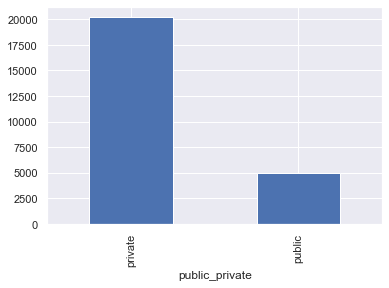

In [42]:
# which type of university is more expensive?
sns.set()
uni_df.groupby('public_private')['instate_tuition'].mean().plot(kind = 'bar');

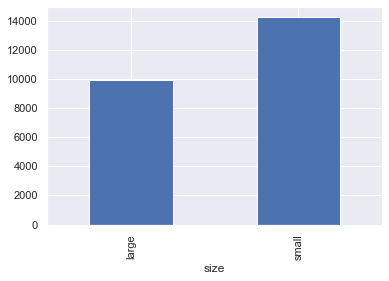

In [43]:
uni_df.groupby('size')['instate_tuition'].mean().plot(kind = 'bar');

While the average net price of public universities are around 8500, private institutions are almost double at 18000. This is also represented by the fact that smaller schools have higher tuition than larger schools.

I wonder if there is a relationship between school size and school type.

### Are small schools more likely to also be private?

In [59]:
# splitting the Scorecard to only have 1 year's results
uni_2017 = uni_df[uni_df['date'] == '2017']

# are smaller schools more likely to also be private?
uni_small_and_private = np.where((uni_2017['size'] == 'small') & (uni_2017['public_private'] == 'private'), 
                                 'private_small', 'no')

In [62]:
len(uni_small_and_private[uni_small_and_private == 'private_small'])/len(uni_2017)

0.6708559782608695

67% of all schools in the College Scorecard are considered small, private universities. This is significant because small, private schools cost significantly more than large, public schools. Students currently attending a small private school may find it more financially feasible to attend a large public university instead.

### What is the trend in student population between small and large schools?

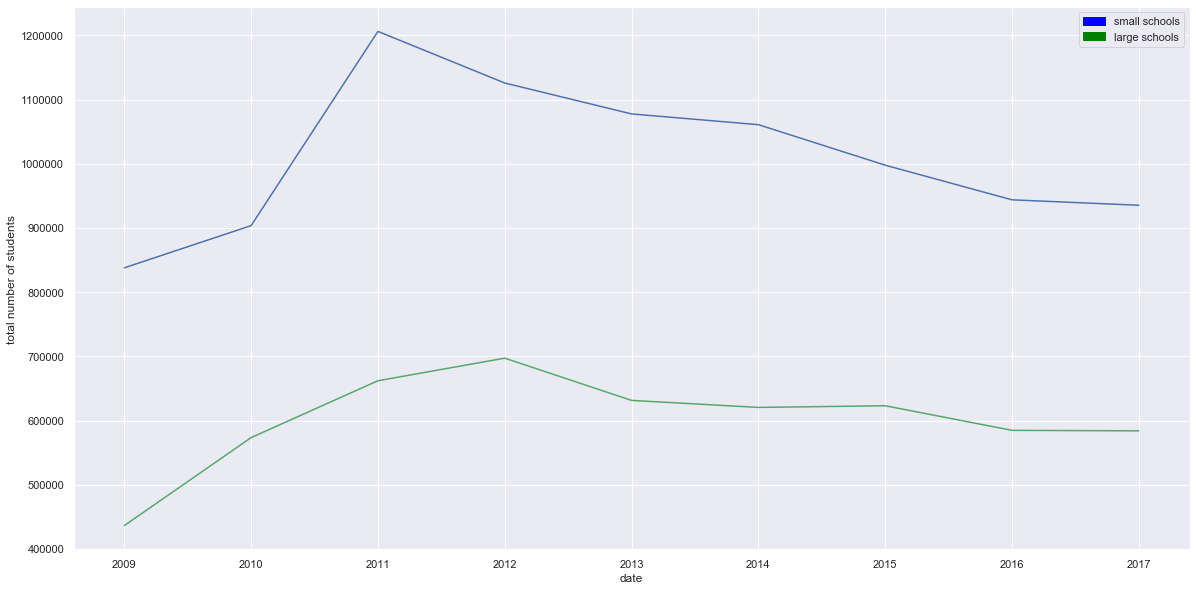

In [63]:
# has there been a migration of students from different sizes of insitutions?
uni_small = uni_df[uni_df['size'] == 'small'].groupby('date')['num_students_all'].sum()
uni_large = uni_df[uni_df['size'] == 'large'].groupby('date')['num_students_all'].sum()

# plotting yearly trend in student attendance, separated by size
plt.figure(figsize = (20,10))
plt.plot(uni_small, color = 'b', alpha = 1)
plt.plot(uni_large, color = 'g', alpha = 1)
plt.xlabel('date')
plt.ylabel('total number of students')
legend_a = mpatches.Patch(color = 'blue', label = 'small schools')
legend_b = mpatches.Patch(color = 'green', label = 'large schools')
plt.legend(handles = [legend_a, legend_b])

plt.show();

There is a modest drop in students attending both private and public universities, perhaps as tuition is increasing and pushes out lower-income students from the market. Public school attendance seems to be dropping at a less rapid pace. Let's take the proportional total student population of large schools to small schools and see if there is a shift.

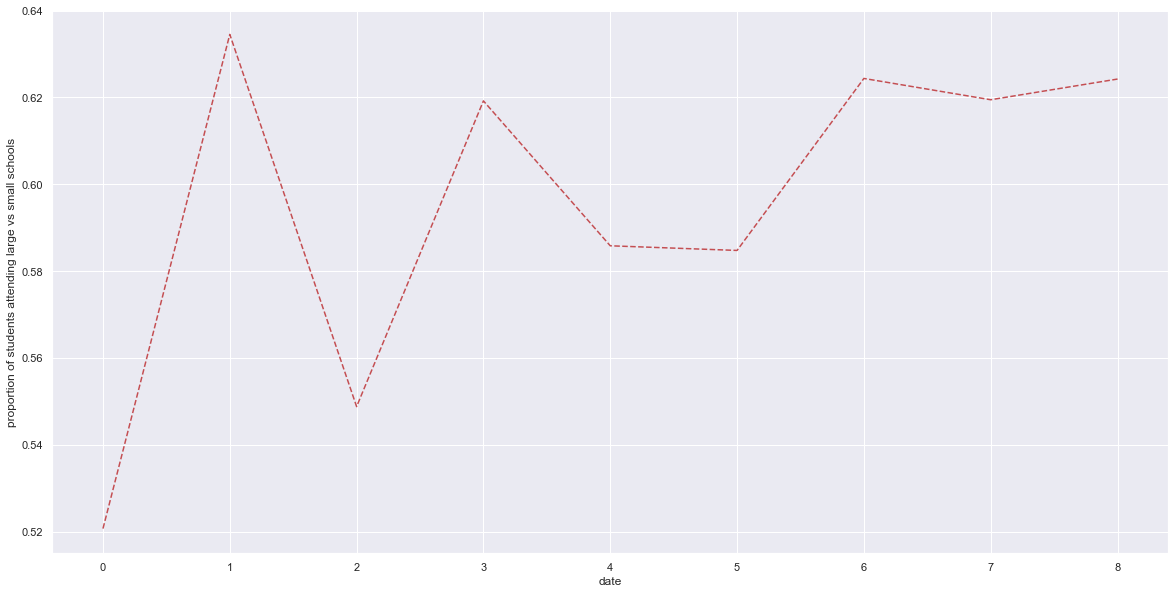

In [66]:
# dividing total number of students in large universities versus small universities
uni_pop_proportions = uni_large.values / uni_small.values

# plotting the change in proportion over time
plt.figure(figsize = (20,10))
plt.plot(uni_pop_proportions, color = 'r', alpha = 1, linestyle = '--')
plt.xlabel('date')
plt.ylabel('proportion of students attending large vs small schools')

plt.show();

Interestingly enough, the proportion of total student attending large schools is increasing, meaning students that aren't pushed out of the market entirely may be moving from small schools to large schools. 

### How has tuition, net price per student, instructional expenses, and faculty salary been trending?

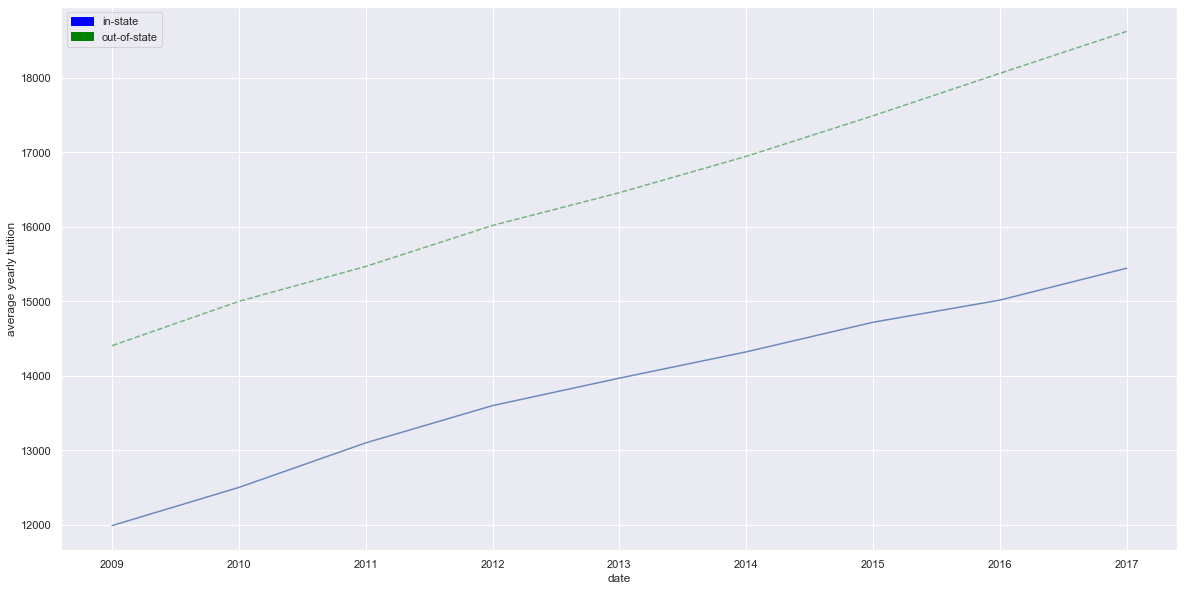

In [25]:
# grouping by date to ascertain average yearly in-state and out-of-state tuition 
uni_instate_tuition = uni_df.groupby('date')['instate_tuition'].mean()
uni_outstate_tuition = uni_df.groupby('date')['outstate_tuition'].mean()

# plotting yearly trend in tuition
plt.figure(figsize = (20,10))
plt.plot(uni_instate_tuition, color = 'b', alpha = 0.8)
plt.plot(uni_outstate_tuition, color = 'g', alpha = 0.8, linestyle = '--')
plt.xlabel('date')
plt.ylabel('average yearly tuition')
legend_a = mpatches.Patch(color = 'blue', label = 'in-state')
legend_b = mpatches.Patch(color = 'green', label = 'out-of-state')
plt.legend(handles = [legend_a, legend_b])

plt.show();

To no one's surprise, both out-of-state and in-state tuition has been increasing in the past 10 years (with the data available). Interestingly enough they've been increasing at around the same rate. This implies that there isn't a strong bias between in-state and out-of-state students, in relative terms at least.

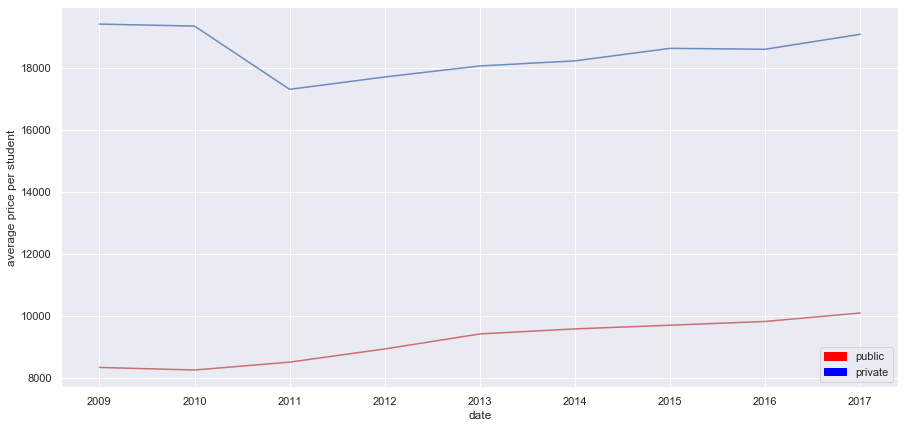

In [26]:
# grouping to determine yearly average net price in public and private schools
uni_public = uni_df[uni_df['public_private'] == 'public'].groupby('date')['net_price_all'].mean()
uni_private = uni_df[uni_df['public_private'] == 'private'].groupby('date')['net_price_all'].mean()

# plotting yearly trend in net price, separated by public and private universities
plt.figure(figsize = (15,7))
plt.plot(uni_public, color = 'r', alpha = 0.8)
plt.plot(uni_private, color = 'b', alpha = 0.8)
plt.xlabel('date')
plt.ylabel('average price per student')
legend_a = mpatches.Patch(color = 'red', label = 'public')
legend_b = mpatches.Patch(color = 'blue', label = 'private')
plt.legend(handles = [legend_a, legend_b])

plt.show();

Compared to tuition, net price is increasing at a much more modest pace. This suggests that the auxiliary costs of going to school (rent, food, transportation just to name a few potential costs) are remaining relatively stable.

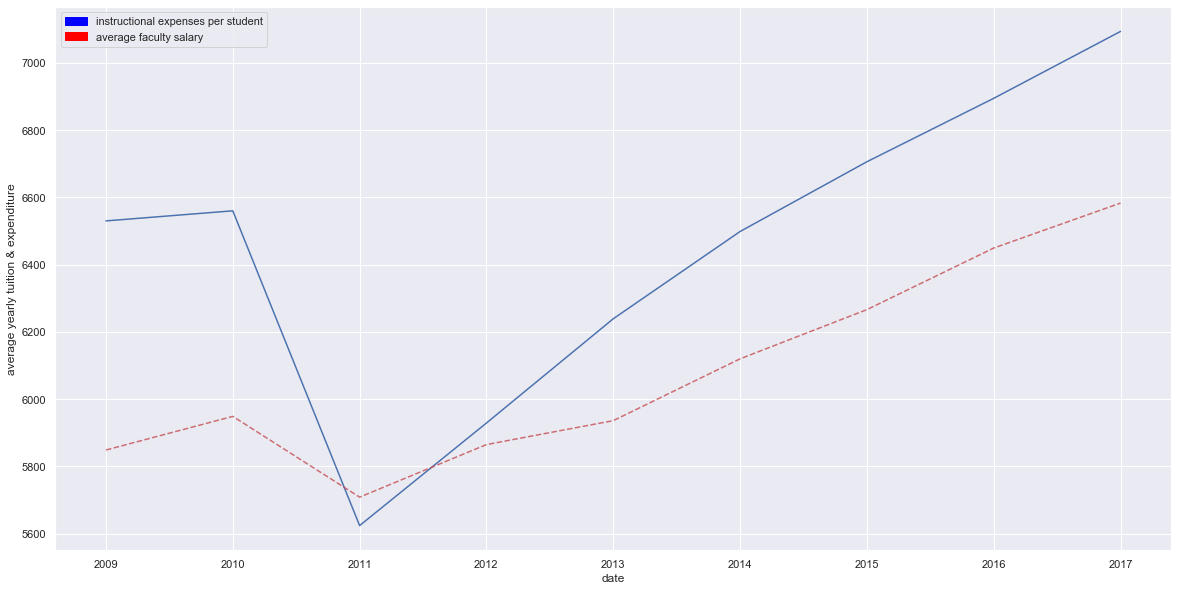

In [28]:
# taking a look at rising instructional expenditure vs. the cost of faculty
uni_expenditure_per_student = uni_df.groupby('date')['instructional_expenditure_per_student'].mean()
uni_faculty_salary = uni_df.groupby('date')['avg_faculty_salary'].mean()

# plotting
plt.figure(figsize = (20,10))
plt.plot(uni_expenditure_per_student, color = 'b', alpha = 1)
plt.plot(uni_faculty_salary, color = 'r', alpha = 0.8, linestyle = '--')
plt.xlabel('date')
plt.ylabel('average yearly tuition & expenditure')
legend_a = mpatches.Patch(color = 'blue', label = 'instructional expenses per student')
legend_b = mpatches.Patch(color = 'red', label = 'average faculty salary')
plt.legend(handles = [legend_a, legend_b])

plt.show();

Instructional expenses, including anything from administrative salaries to textbooks to professors, rose at the same time as the average faculty salary in increasing proportions since 2012. This trends implies that expenses unrelated to faculty, such as administrative expenses and new amenities, may have been the driving force of increasing tuition.

### Are more students now taking on more loans?

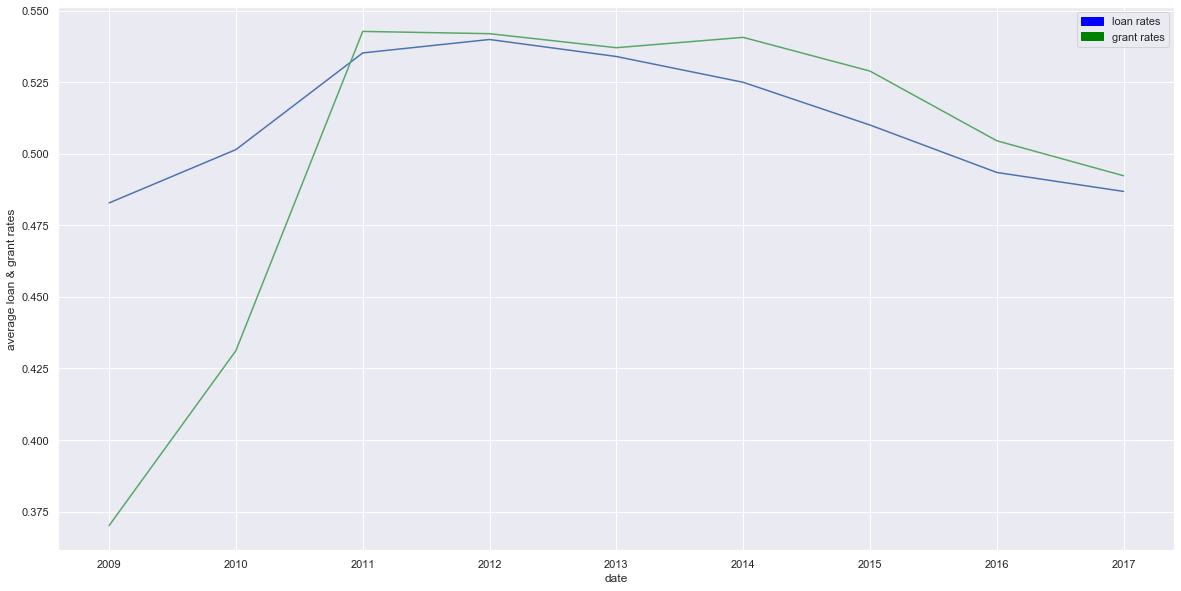

In [64]:
# what's been the trend of federal loan and pell grant rates?
uni_loan_rates = uni_df.groupby('date')['federal_loan_rate'].mean()
uni_grant_rates = uni_df.groupby('date')['grant_rate'].mean()

# plotting
plt.figure(figsize = (20,10))
plt.plot(uni_loan_rates, color = 'b', alpha = 1)
plt.plot(uni_grant_rates, color = 'g', alpha = 1)
plt.xlabel('date')
plt.ylabel('average loan & grant rates')
legend_a = mpatches.Patch(color = 'blue', label = 'loan rates')
legend_b = mpatches.Patch(color = 'green', label = 'grant rates')
plt.legend(handles = [legend_a, legend_b])

plt.show();

Seems like the proportion of student that get grants and loans have been decreasing modestly in the last 8 years. Couple with rising tuition, this could mean that students may be paying for the inflated tuition through other means, such as increased contributions from parents, scholarships, or out-of-pocket income.

### What are other drivers of tuition?

Let's look at some correlations and see if there's anything interesting here relating to in-state or out-of-state tuition.

In [30]:
uni_df_to_corr.corr()

,index,admission_rate,sat_avg_overall,net_price_public,net_price_private,num_students_public,num_students_private,instate_tuition,outstate_tuition,net_revenue_per_student,...,avg_faculty_salary,ft_faculty_rate,grant_rate,federal_loan_rate,financial_independent_student_rate,avg_income_dependent_students,avg_income_independent_students,median_grad_debt,median_withdraw_debt,median_earnings_6years
index,1.000000,0.028620,0.103915,0.128967,0.010302,-0.027412,-0.089390,0.082299,0.110793,0.055779,...,0.101432,0.067417,0.060545,-0.021254,-0.014586,0.007914,0.007547,0.122655,0.167772,-0.048681
admission_rate,0.028620,1.000000,-0.348394,0.049933,-0.102610,-0.068055,-0.137676,-0.237203,-0.266826,-0.119362,...,-0.343684,-0.091286,0.173760,0.048481,0.183761,-0.169382,0.013742,0.028867,-0.069254,-0.266618
sat_avg_overall,0.103915,-0.348394,1.000000,0.356426,0.368250,0.366008,0.286901,0.499133,0.645196,0.515626,...,0.661380,0.178876,-0.680393,-0.463984,-0.364686,0.668367,-0.102796,-0.166840,0.005287,0.532734
net_price_public,0.128967,0.049933,0.356426,1.000000,NaN,0.240821,NaN,0.772521,0.670013,0.610788,...,0.391565,0.265654,-0.096918,0.616414,-0.352200,0.690510,0.408840,0.657387,0.556557,0.591676
net_price_private,0.010302,-0.102610,0.368250,NaN,1.000000,NaN,0.197262,0.589497,0.588765,0.492657,...,0.406099,-0.043712,-0.324188,0.300499,-0.182355,0.465212,0.283182,0.393146,0.320942,0.456199
num_students_public,-0.027412,-0.068055,0.366008,0.240821,NaN,1.000000,NaN,0.343357,0.439603,0.293101,...,0.407376,0.128607,-0.082498,0.218085,-0.477023,0.316429,0.065597,0.253679,0.242349,0.276096
num_students_private,-0.089390,-0.137676,0.286901,NaN,0.197262,NaN,1.000000,0.292529,0.292359,0.173711,...,0.308618,0.141410,-0.156493,0.033563,-0.285451,0.246186,0.088007,0.160031,0.139512,0.213472
instate_tuition,0.082299,-0.237203,0.499133,0.772521,0.589497,0.343357,0.292529,1.000000,0.922163,0.568931,...,0.303314,0.161739,-0.197465,0.425127,-0.299075,0.623024,0.233091,0.482900,0.425584,0.433500
outstate_tuition,0.110793,-0.266826,0.645196,0.670013,0.588765,0.439603,0.292359,0.922163,1.000000,0.516992,...,0.498553,0.234830,-0.324820,0.351104,-0.472323,0.743583,0.255258,0.484157,0.461800,0.521238
net_revenue_per_student,0.055779,-0.119362,0.515626,0.610788,0.492657,0.293101,0.173711,0.568931,0.516992,1.000000,...,0.087803,0.031659,-0.050263,0.176855,-0.077110,0.299051,0.150455,0.264943,0.260544,0.285493


Tuition seems to be tied to avg_income_dependent_students (income of parents) with around a 0.7 correlation. This seems to suggest that parents are helping out more with tuition than they used to, leveraging their family income to pay for more expensive schools.

## Solution

### Limit spending on activities not directly tied to education

Instructional expenses have been increasing dispreportionally to faculty salaries. The Federal Government should either subsidize or impose a limit on how much schools can spend on infrastructural improvements and other activities that aren't directly traceable to student learning. In addition, the government should also increase awareness for federal loan and grant program to students, as loan and grant rates have been on the decline. Schools should also be incentivized to display alternative ways of financing tuition, such as scholarships, to reduce the burden on students and their families.

### Subsidize education for low-income families

Due to parental income having a 0.7 correlation with the amount of tuition a student pays, the Government at all levels should spend to further subsidize tuition for lower-income families. Looking at the lower rate at which students are getting grants, this trend should be flipped the other direction, with more grants getting to people that need it most.

### Promote instate programs as opposed to out-of-state programs

Because out-of-state tuition costs so much more than instate tuition, the State Governments should make an effort to invest in local state colleges and promote instate programs to high school students. This should alleviate some of the financial burden on students, as many could theoretically find a program suitable to them within their own state.

### In the long-term, regulate the market of private colleges and invest to increase capacity at public colleges

Small private universities, who are profit-driven, tend to charge more tuition than large public universities. Currently, there is a disproportionate amount of students that attend private colleges, increasing their financial burden. While not an easy solution, the Federal Government should, in the long-term, examine the mix between public to private colleges in the US. Policies could be enacted in the future that put a price ceiling on increases in tuition at private colleges and employ more tax dollars to invest in public institutions.

## Constraints and limitations


### Limited tuition data

Having no tuition data available for around 46% of schools. This issue is constant across every year. Looking at the heatmap of missing values, it looks like most of missing tuition data is from private colleges with no obligation to release any data. These shortfall increases uncertainty around the tuitions of 68% of observations, as 68% of all schools are private. There's really no way of estimating the size of this uncertainty without making assumptions about the schools that haven't released any data. 

### Limited income data

With almost 50% of median income after 6 years of graduation missing, the question remains if the investments students are making in their tuition are worth it in the long-run. Because of the sheer amount of data missing, I did not use post-graduation income as part of my analysis.

### No insight on types of programs offered

Due to the time constraints, I was not able to compare different types of schools by the types of degrees they offer. As a potential next step, I would segment tuition by type of program (arts, engineering, economics, etc.) and discern trends for STEM and non-STEM fields. It's maybe the case that small private colleges also offer many lucrative STEM degrees, and therefore command a higher price as STEM fields (from prior knowledge) pay significantly more than non-STEM fields. 

### School ranking and promotion

This dataset does not allude to different marketing tactics used by different schools to attract students nor does it give a relative ranking of each school. Students may get drawn to colleges with higher prestige, which in turn have more applications, resulting in higher administrative costs and higher tuition.